# TANGO1 project

## Project Title

### This file is asummary of the analysis doen so faron this topic

*disclaimer the codes isted are not meant to be run inside jupyter-notebook, to have a description of the code open the scripts or lounch them with --help option.

### Glossary used throughout the file

**TANGO** = Transport ANd Golgi Organization

**MIA** = Melanoma Inibitory Activity

**TM** = Trans Membrane

**MSA** = Multiple Sequence Analisys

**OM** = Original Model (referred to phobius often tmes)

**plp** = Posterior Label Probability (confidence of predicting model)


### Introduction: Biological background.

- This study arises from the need to discover the role of the peculiar Trans-Membrane region of TANGO1. In Human, such protein presents two consecutive TM helices, but the protein itself spans the membrane only once.
- TANGO1 is also responsible for bulky cargo transport between ER and Golgi through an atypical mechanism that does not involve vesicle budding, but a direct tunnel between post-ER compartments and the ER.
- It was shown in vitro that the presence of the two TM helices in TANGO1 reduces the flux of lipids across the saddle-shaped membrane, found at the junction of an ERES and a downstream compartment (image below).

<div>
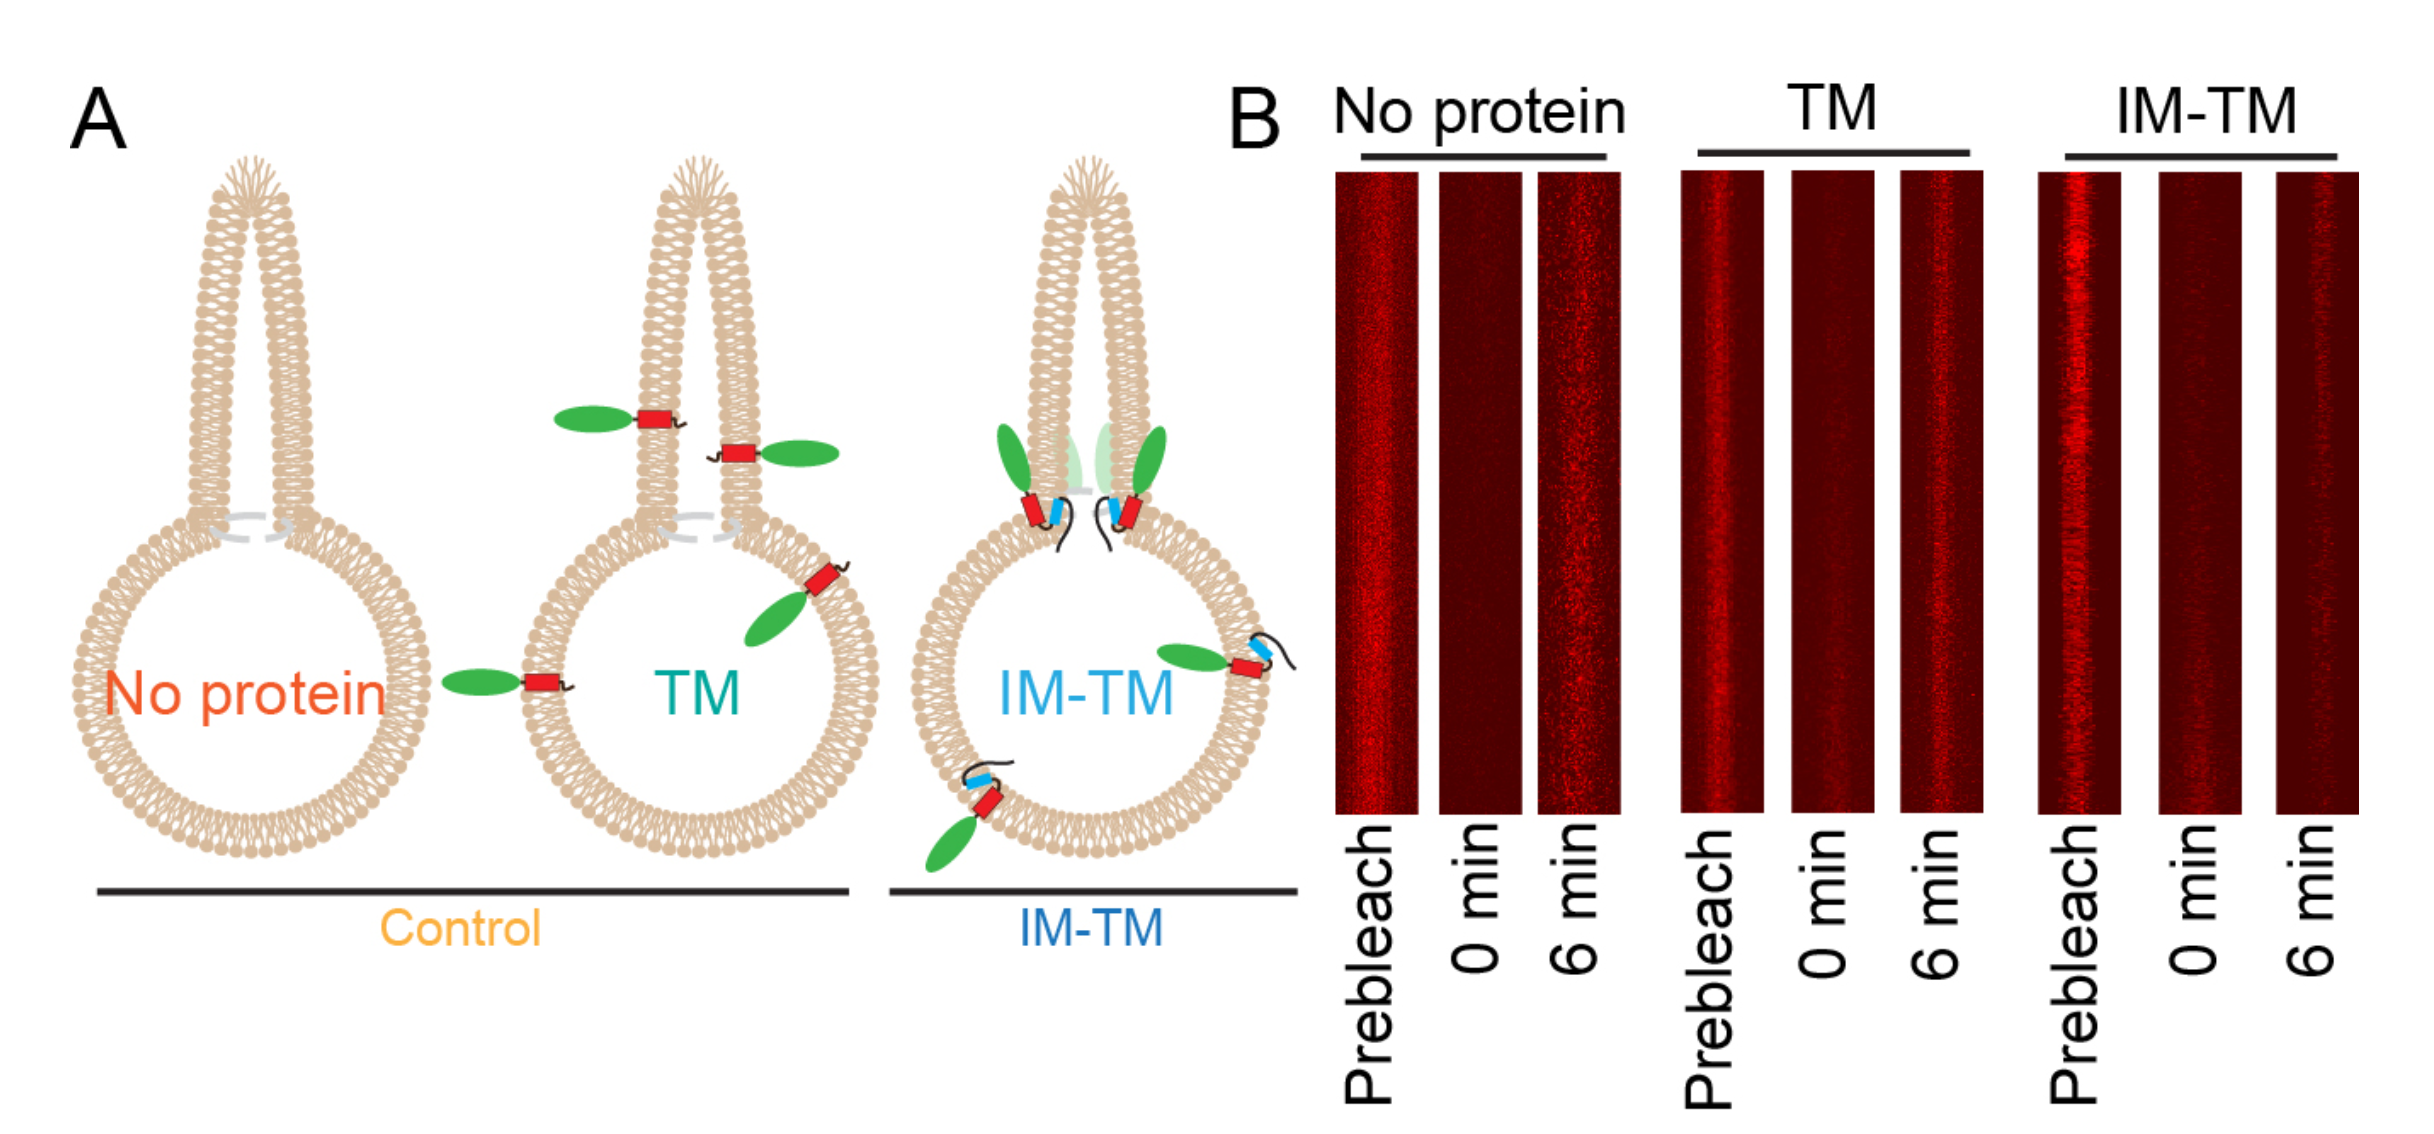
</div>

To make clarifications about TANGO1 and its isoform and paralogs, is usefull to consider the (image below). For sake of implicity MIA3 will always be called TANGO1 and when it is not specified it will always refere to the longest isoform of TANGO1. The paralog of TANGO1 is MIA2 aka TALI, it will be called MIA2 from now on and it will refer to the longest isoform once again. 

<div>
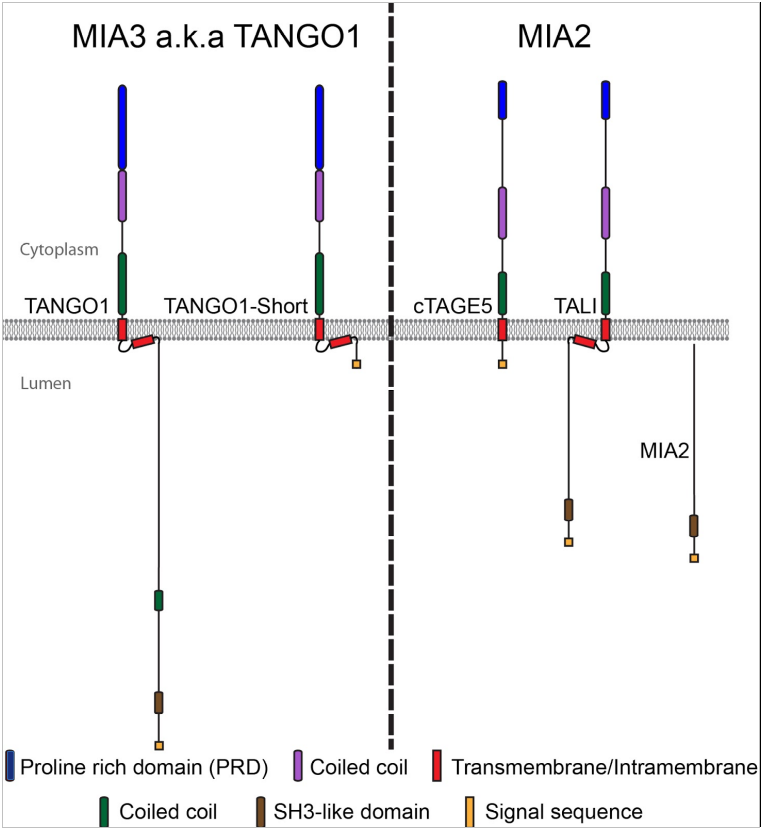
</div>

Considering the experimental information gathered so far, it would be interesting to take a look at this problem from an bioinformatic perspective. If it would be possible for an algorithm to identify some unrelated sequences to TANGO1, that however, retain its function when expressed in vivo replacing its TM region; then it would be safe to assume that the algorithm has indeed learnt a set of patterns and/or properties associated to TANGO1 TM region.

The first step has been to gather a refined set of TANGO1 vertebrate orthologs. To do so the orthoogs clusterd in two different dtabases (OMA and Metaphor) have been united. Starting from 3 sequences as queries for both databases: TANGO1 human uniprotID Q5JRA6-1, TANGO1 danio-rerio F1R5N2, TANGO1 drosophila-melanogaster Q9VMA7-1.

In [ ]:
files:
    OMA_danio_MIA3_raw.fasta
    OMA_danio_MIA3_raw.fasta
    OMA_danio_MIA3_raw.fasta
    Metaphor_danio_MIA3_raw.fasta
    Metaphor_drome_MIA3_raw.fasta
    Metaphor_drome_MIA3_raw.fasta

To simplify the task only TANGO1 1 to 1 orthologs have been selected, furthermore since we needed a MSA we decided to keep only vertebrate orthologs. Because TANGO1 is already hard to allign by himself (due to the disordered region before the TM region) on top of that adding the variation due to distantly related species creates to much confusion in the MSA step. Code below (may be updated to DSL2).

In [ ]:
./../pipelines/get_vertebrate.nf --OMA_dir ../OMA/ --Met_dir ../Metaphor/ --kingdom Vertebrata

The above script filterson vertebrata and refines the input file to be in canonical fasta format. On top of that it uses phobius OM to predict such selected orthologs, it generateds for every ortholog sequence a png (image) file like the ones below.

<div>
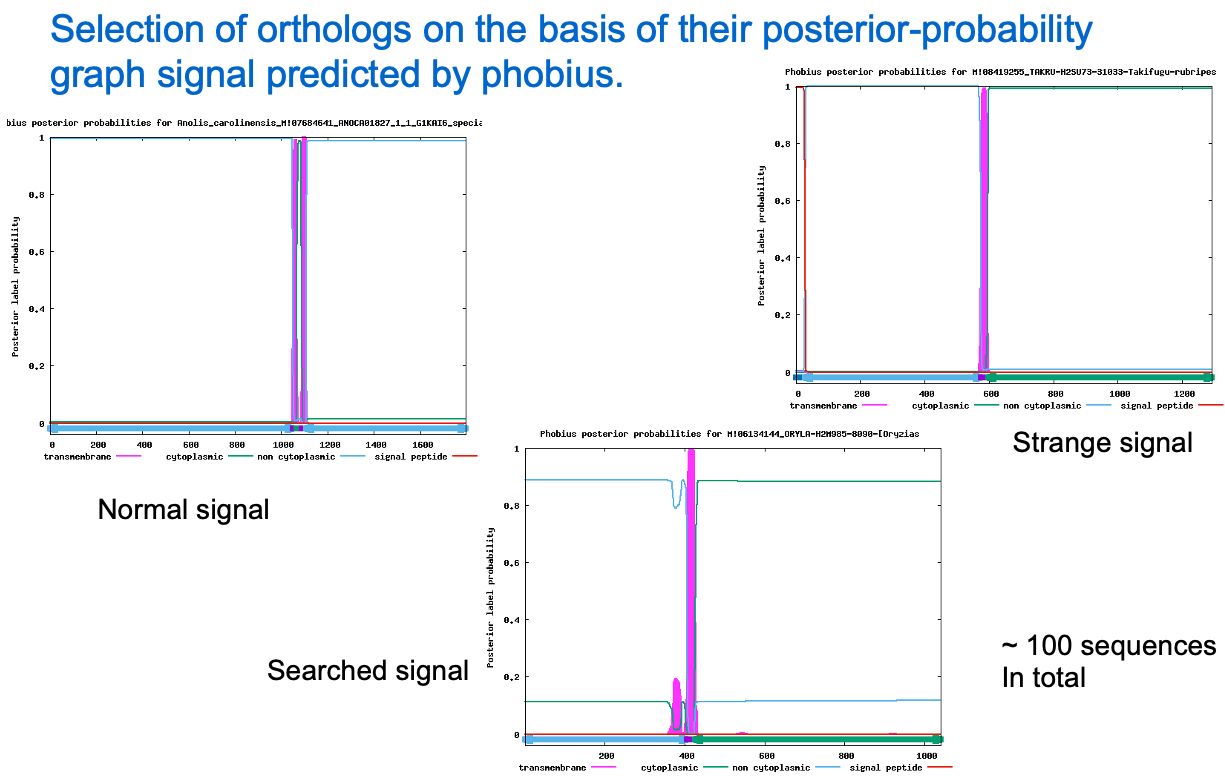
</div>

Where on the x axis are the amminoacid positions, and on the y there is the plp value associated to such aa position. So a purple spike corresponds to a regio where the model is confident of the presence of a TM helix, it may or may not make into the actual prediction. The "final" prediction is visualized in the image as a coloured bar right above the x axis, the colours are the onnes present in the legend. 

As for this three plp graphs of TANGO1 orthologs, they summarize the criteria for the filtering of the orthologs. Every single vertebrate ortolog plp graph was visualy (manually) inspect for the presence of one/two consecutive TM helix signals roughly in the middle of the protein itself.

After these first filtering steps, a MSA is built considering only the TM region. Easier to allign and no reson to include the disordered region. To trimm each sequence the last aa with plp greater than 90% has been chosen as reference for the cut, this is specific for every sequence.  So every sequence aligned starts in a slightly different position (1 or 2 aa). Badly alligned sequences are removed and the MSA re-computed, sequence are considered "badly" alligned if their ansi score computed by t-coffee is below 50 (arbitrary threshold). Everithing mention so far for the MSA is done with the following pipeline.

In [ ]:
./../pipelines/aln_generation_colouring.nf --INPUT headers_of_selected_orthologs_example.txt --TRIMM 70,30 \\
    --PLP_DIR ../all_phobius_results/good_pp_vert_originalModel/plps/ \\
    --PHOB_STDOUT ../all_phobius_results/good_pp_vert_originalModel/output_filename_example.txt \\
    -resume -profile bovreg -process.cpus 3 

This pipeline also colours every sequence in the MSA by it phobius OM prediction and plp value and Hydrophobicity. So basically three identical MSA are generated and coloured as mentioned. The First one (left) simply shows which orthologs have the first helix predicted (in green), he second (right) the plp values associated to each aa, where more blue means higher values and green below 50% and yellow below 30%. images below. 

<table><tr>
<td> <img src="positive_set2_phobius_pred.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="positive_set2_alignment.png" alt="Drawing" style="width: 520px;"/> </td>
</tr></table>

This behaviour is partially explained by the coloration of such MSA using the Hydrophobicity, the scale used is  Unified Hydrophobicity Scale (UHS). Very hydrophobic residues are coloured in red and Hydrophilic ones in blue.

<table><tr>
<td> <img src="positive_set2_phobius_pred.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="positive_set2_UHS_hydrocolor.png" alt="Drawing" style="width: 520px;"/> </td>
</tr></table>